# San Francisco Housing Market Analysis

In [28]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In [4]:
# Calculate the mean number of housing units per year 

avg_housing_units_per_year = sfo_data["housing_units"].groupby("year").mean()
avg_housing_units_per_year = pd.DataFrame(avg_housing_units_per_year) 
avg_housing_units_per_year.head()

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348


In [5]:
# Set the output file path
output_file_path = Path("Data/sfo_average_housing_units.csv")

# Save the dataframe as a csv file
avg_housing_units_per_year.to_csv(output_file_path)

In [6]:
# Use the min, max, and std to scale the y limits of the chart

min_of_annual_unit_averages = int(avg_housing_units_per_year.min())
max_of_annual_unit_averages = int(avg_housing_units_per_year.max())
std_of_annual_unit_averages = int(avg_housing_units_per_year.std())
print(f"\nMinimum Value of the Annual Averages of Units: {min_of_annual_unit_averages}") 
print(f"Maximum Value of the Annual Averages of Units: {max_of_annual_unit_averages}")
print(f"Standard Deviation of the Annual Averages of Units: {std_of_annual_unit_averages}")


Minimum Value of the Annual Averages of Units: 372560
Maximum Value of the Annual Averages of Units: 384242
Standard Deviation of the Annual Averages of Units: 4206


- - - 

## Average Housing Costs in San Francisco Per Year


In [7]:
# Use the Pandas plot function to plot the average housing units per year.

avg_housing_units_per_year.hvplot.bar(label="Housing Units in San Fransisco from 2010 to 2016",
                                      xlabel = "Year", 
                                      ylabel = "Housing Units",
                                      ylim = (370000, 387500),
                                      height = 300,
                                      width = 400,
                                     ).opts(yformatter="%.0f")

:Bars   [year]   (housing_units)

In [8]:
# Calculate the average sale price per square foot

average_sales_price_per_sqft = sfo_data["sale_price_sqr_foot"].groupby(["year"]).mean()
average_sales_price_per_sqft = pd.DataFrame(average_sales_price_per_sqft) 

# Calculate the average gross rent

average_monthly_rent = sfo_data["gross_rent"].groupby(["year"]).mean()
average_monthly_rent = pd.DataFrame(average_monthly_rent)

avg_rent_and_sales_price_per_sqft = pd.concat([average_sales_price_per_sqft, average_monthly_rent], axis='columns', join='inner')


# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot

sqft = avg_rent_and_sales_price_per_sqft.sale_price_sqr_foot.hvplot.line(
        height = 300, 
        width = 400,
        xlabel = "Year", 
        line_color = "Purple", 
        line_width = 2, 
        ylabel = "Price per SqFt", 
        ylim = (300, 700), 
        title = "Average Price per SqFt by Year"
        )

# Line chart for average montly rent

rent = avg_rent_and_sales_price_per_sqft.gross_rent.hvplot.line(
        height = 300, 
        width = 400,
        xlabel = "Year", 
        line_color = "Orange", 
        line_width = 2, 
        ylabel = "Average Gross Rent", 
        ylim = (1000, 4500), 
        title = "Average Rent by Year"
        )
sqft + rent

:Layout
   .Curve.Sale_price_sqr_foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_rent          :Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values

avg_df = sfo_data.groupby(["year", "neighborhood"]).mean()
avg_df.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft

avg_df.sale_price_sqr_foot.hvplot.line(
        height = 300,
        width = 700,
        xlabel = "Year", 
        line_color = "Blue", 
        line_width = 2, 
        ylabel = "Price per SqFt", 
        ylim = (100, 1000), 
        title = "Average Price per SqFt by Year",
        groupby = 'neighborhood',
        widget_location='left_top'
        )

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [11]:

# Use hvplot to create an interactive line chart of the average monthly rent

avg_df.gross_rent.hvplot.line(
        height = 300,
        width = 700,
        xlabel = "Year", 
        line_color = "Blue", 
        line_width = 2, 
        ylabel = "Gross Rent", 
        ylim = (1000, 4500), 
        title = "Average Monthly Rent",
        groupby = 'neighborhood',
        widget_location='left_top'
        )

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

## The Top 10 Most Expensive Neighborhoods

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own  

top_10_price_per_sqft = sfo_data.groupby(by="neighborhood").mean()
top_10_price_per_sqft = top_10_price_per_sqft.nlargest(10,"sale_price_sqr_foot")
top_10_price_per_sqft.reset_index(inplace=True)
top_10_price_per_sqft.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [13]:
# Plotting the data from the top 10 expensive neighborhoods

top_10_price_per_sqft_plot = top_10_price_per_sqft.hvplot.bar(
    height = 400, 
    width = 700, 
    x = "neighborhood", 
    y = "sale_price_sqr_foot",  
    color = "Blue", 
    xlabel = "Neighborhood", 
    ylabel = "Price per Square Foot" , 
    rot = 90, 
    title = "Top Ten Most Expensive Neighborhoods by Price per SqFt"
)

top_10_price_per_sqft_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In [14]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood

avg_df.reset_index(inplace=True)
avg_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [15]:
# Plotting the data from the top 10 expensive neighborhoods

top_10_price_per_rent = avg_df.groupby(by=["year","neighborhood"]).mean()
top_10_price_per_rent.reset_index(inplace=True)
top_10_price_per_rent.sort_values(by="sale_price_sqr_foot", ascending = False)
top_10_price_per_rent.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [16]:

top_10_price_per_rent_plot = top_10_price_per_rent.hvplot.bar(
    height = 400,
    width = 700,
    x = "year",
    y = ["gross_rent", "sale_price_sqr_foot"],
    color = ["Blue","Orange"],
    xlabel = "Neighborhood",
    ylabel = "Housing Units",  
    rot = 90,
    title = "Top Ten Most Expensive Neighborhoods",
    ylim = (100, 4500),
    groupby="neighborhood"
)
top_10_price_per_rent_plot

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

### Load Location Data

In [17]:
# Load neighborhoods coordinates data

file_path = Path("Data/neighborhoods_coordinates.csv")
coordinate_data = pd.read_csv(file_path)
coordinate_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

In [18]:
# Calculate the mean values for each neighborhood

avg_values_neighborhood = sfo_data.groupby(by="neighborhood").mean()
avg_values_neighborhood.reset_index(inplace=True)
avg_values_neighborhood.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [19]:
# Join the average values with the neighborhood locations

combined_df = pd.concat([avg_values_neighborhood, coordinate_data],axis='columns', join='inner')
combined_df = combined_df.drop(columns = ["neighborhood"])
combined_df = combined_df.set_index(["Neighborhood"])
combined_df.reset_index(inplace=True)
combined_df.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


### Mapbox Visualization

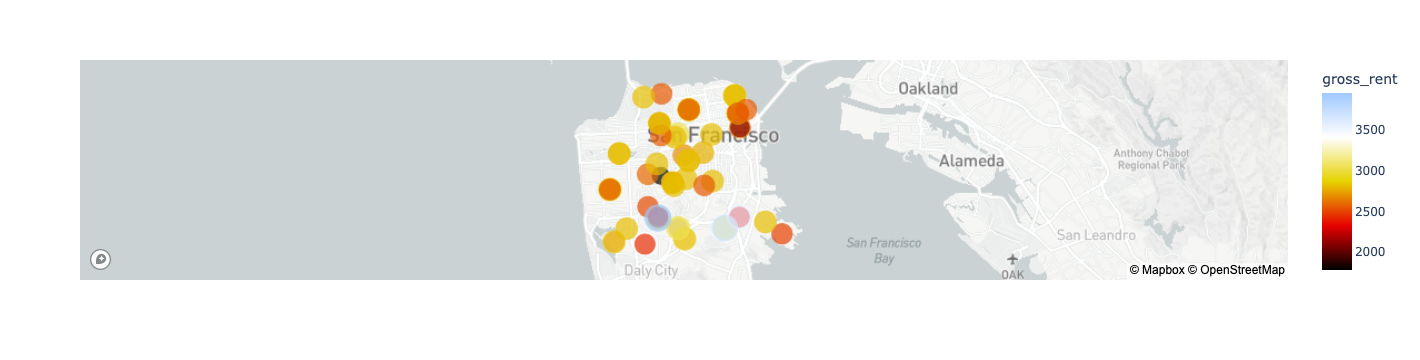

In [29]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info

map_plot = px.scatter_mapbox(
    combined_df,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="gross_rent",
    zoom=10,
    color_continuous_scale = 'blackbody'
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [24]:
# Fetch the data from all expensive neighborhoods per year.

# Fetch the data from all expensive neighborhoods per sqft
top_10_price_per_sqft = sfo_data.groupby(["neighborhood"]).mean()
top_10_price_per_sqft = top_10_price_per_sqft.nlargest(10, "sale_price_sqr_foot")
top_10_price_per_sqft.reset_index(inplace=True)
top_10_price_per_sqft.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


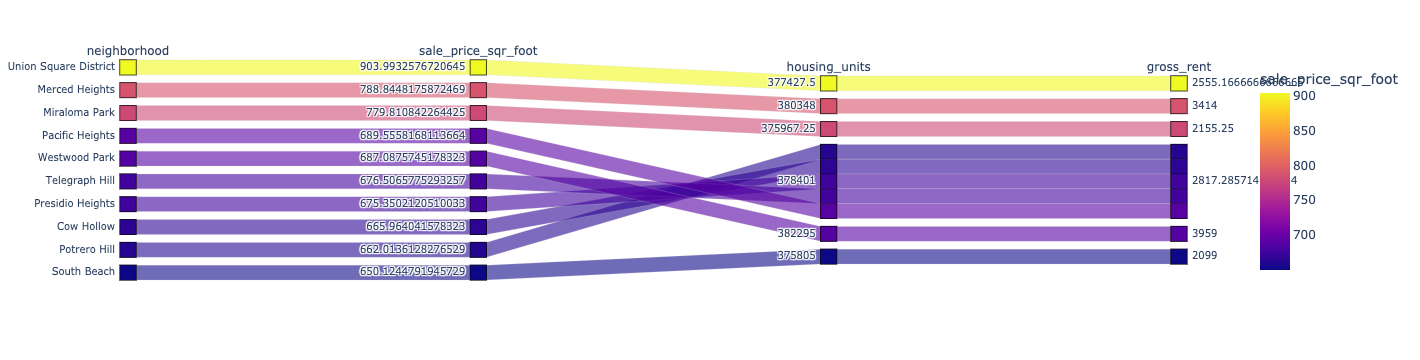

In [25]:
# Parallel Categories Plot

px.parallel_categories(
    top_10_price_per_sqft,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
)

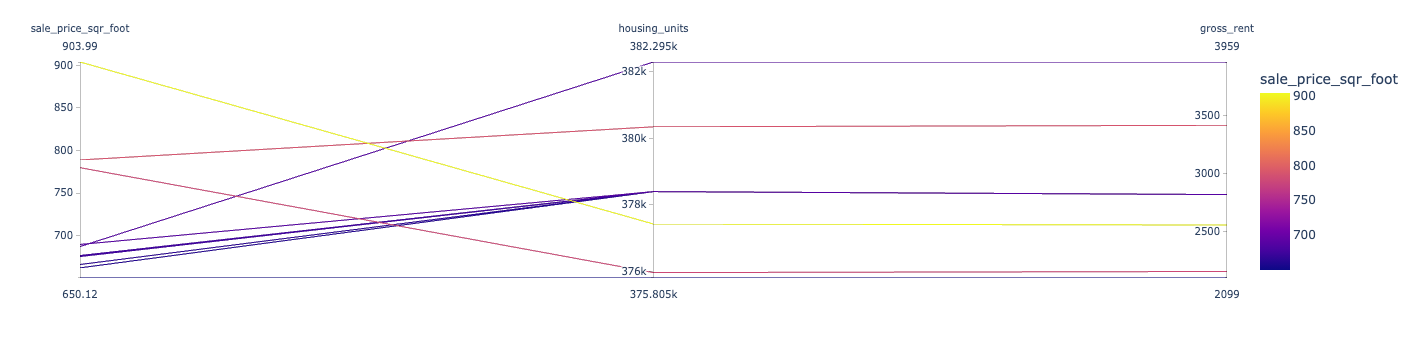

In [30]:
# Parallel Coordinates Plot

px.parallel_coordinates(top_10_price_per_sqft, color='sale_price_sqr_foot')